## Salary Prediction

### EDA

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings( 'ignore' )
plt.style.use("fivethirtyeight")

In [2]:
# using multiple dataset files
df_files = ['CAGEDMOV202208.txt', 'CAGEDMOV202207.txt', 'CAGEDMOV202206.txt']
df_caged = (pd.read_csv(f, sep=';') for f in df_files)
df = pd.concat(df_caged, ignore_index=True)
ocup = pd.read_excel('Layout-Caged.xlsx', sheet_name='cbo2002ocupação')

In [3]:
# using only one dataset
df = pd.read_csv("CAGEDMOV202208.txt", sep=";")
ocup = pd.read_excel('Layout-Caged.xlsx', sheet_name='cbo2002ocupação')


In [ ]:
# Treated dataframe to speed up the process
df = pd.read_csv("CAGEDMOV202207.csv")

In [3]:
df.head(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo
0,202208,4,41,410690,J,5811500,-1,760605,101,7,...,0,0,"5841,78",5,0,1,202208,0,5,"5841,78"
1,202208,4,41,412550,I,5611201,-1,513505,101,7,...,0,0,"1585,00",4,0,1,202208,0,5,"1585,00"
2,202208,4,41,411520,H,4930202,1,782510,101,7,...,0,0,"1920,50",5,0,1,202208,0,5,"1920,50"


In [4]:
ocup.head(3)

,Código,Descrição
0,10105,Oficial General da Aeronautica
1,10110,Oficial General do Exercito
2,10115,Oficial General da Marinha


In [5]:
df = pd.merge(df, ocup, left_on='cbo2002ocupação', right_on='Código', how='inner',indicator=False).drop(columns = ['Código'])

In [6]:
df.sample(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
10502136,202208,2,26,260960,N,7830200,-1,511205,101,9,...,0,"1809,44",9,0,1,202208,0,5,"1809,44",Fiscal de Transportes Coletivos (Exceto Trem)
2846738,202206,1,15,150240,F,4221904,-1,411010,103,7,...,0,"620,00",7,1,1,202206,0,5,"620,00",Assistente Administrativo
1004745,202208,3,33,330190,G,4639701,1,783225,101,7,...,0,"1669,17",7,0,1,202208,0,5,"1669,17",Ajudante de Motorista


In [7]:
# Filtering (uf = SP | city = São Paulo | CBO = 212 [Aréas relacionadas a tecnologia])
df = df[(df.uf == 35) & (df.município == 355030) & (df.cbo2002ocupação.isin([212205, 212210, 212215, 212305, 212310, 212315, 212320, 212405, 212410, 212415, 212420, 212425, 212430]))]
df.head(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
902440,202208,3,35,355030,K,6542100,-1,212405,101,9,...,0,"13000,00",9,0,1,202208,0,5,"13000,00",Analista de Desenvolvimento de Sistemas
902441,202208,3,35,355030,N,8220200,-1,212405,101,8,...,0,"11793,00",9,0,1,202208,0,5,"11793,00",Analista de Desenvolvimento de Sistemas
902444,202208,3,35,355030,J,6201501,1,212405,101,9,...,9,"11175,00",9,0,1,202208,0,5,"11175,00",Analista de Desenvolvimento de Sistemas


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26537 entries, 902440 to 10853349
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   competênciamov          26537 non-null  int64  
 1   região                  26537 non-null  int64  
 2   uf                      26537 non-null  int64  
 3   município               26537 non-null  int64  
 4   seção                   26537 non-null  object 
 5   subclasse               26537 non-null  int64  
 6   saldomovimentação       26537 non-null  int64  
 7   cbo2002ocupação         26537 non-null  int64  
 8   categoria               26537 non-null  int64  
 9   graudeinstrução         26537 non-null  int64  
 10  idade                   26534 non-null  float64
 11  horascontratuais        26536 non-null  object 
 12  raçacor                 26537 non-null  int64  
 13  sexo                    26537 non-null  int64  
 14  tipoempregador          26537 

In [9]:
df.shape

(26537, 29)

In [10]:
(df.isna().sum() / len(df)) * 100

competênciamov            0.000000
região                    0.000000
uf                        0.000000
município                 0.000000
seção                     0.000000
subclasse                 0.000000
saldomovimentação         0.000000
cbo2002ocupação           0.000000
categoria                 0.000000
graudeinstrução           0.000000
idade                     0.011305
horascontratuais          0.003768
raçacor                   0.000000
sexo                      0.000000
tipoempregador            0.000000
tipoestabelecimento       0.000000
tipomovimentação          0.000000
tipodedeficiência         0.000000
indtrabintermitente       0.000000
indtrabparcial            0.000000
salário                   0.000000
tamestabjan               0.000000
indicadoraprendiz         0.000000
origemdainformação        0.000000
competênciadec            0.000000
indicadordeforadoprazo    0.000000
unidadesaláriocódigo      0.000000
valorsaláriofixo          0.000000
Descrição           

In [11]:
df['horascontratuais'].isnull().sum()

1

In [12]:
# Fill NaN values by MODE

df['horascontratuais'].fillna(df['horascontratuais'].value_counts().idxmax() , axis=0 ,inplace=True)

In [13]:
# unidadesaláriocódigo = 5 [Monthly Wage] 15 = [Hour] 1 = [N/A]  )
df.unidadesaláriocódigo.value_counts()

5     26454
2        49
1        31
6         2
99        1
Name: unidadesaláriocódigo, dtype: int64

In [14]:
# Filtering (unidadesaláriocódigo = 5 [Monthly Wage])
df = df[(df.unidadesaláriocódigo == 5)]
df.unidadesaláriocódigo.value_counts()

5    26454
Name: unidadesaláriocódigo, dtype: int64

In [15]:
df['salário'] = df['salário'].str.replace(',','.').astype(float)
df['valorsaláriofixo'] = df['valorsaláriofixo'].str.replace(',','.').astype(float)
df['horascontratuais'] = df['horascontratuais'].str.replace(',','.').astype(float)

In [16]:
# Grouping graudeinstrução 2: "Até 5ª Incompleto", 3: "5ª Completo Fundamental", 4: "6ª a 9ª Fundamental", 5: "Fundamental Completo", 6: "Médio Incompleto" em médio incompleto

df["graudeinstrução"] = df["graudeinstrução"].replace([2, 3, 4, 5, 6], 2) # Fundamental e Médio Incompleto
df["graudeinstrução"] = df["graudeinstrução"].replace([7], 3) # Médio Completo
df["graudeinstrução"] = df["graudeinstrução"].replace([8], 4) # Superior Incompleto
df["graudeinstrução"] = df["graudeinstrução"].replace([9], 5) # Superior Completo
df["graudeinstrução"] = df["graudeinstrução"].replace([10], 6) # Mestrado
df["graudeinstrução"] = df["graudeinstrução"].replace([11], 7) # Doutorado
df["graudeinstrução"] = df["graudeinstrução"].replace([80], 8) # Pós completa


df[["graudeinstrução"]].value_counts(sort = False) # Checking the frequency

graudeinstrução
1                     31
2                    186
3                   3558
4                   4594
5                  14831
6                    417
7                    124
8                   2713
dtype: int64

In [17]:
df.head(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
902440,202208,3,35,355030,K,6542100,-1,212405,101,5,...,0,13000.0,9,0,1,202208,0,5,13000.0,Analista de Desenvolvimento de Sistemas
902441,202208,3,35,355030,N,8220200,-1,212405,101,4,...,0,11793.0,9,0,1,202208,0,5,11793.0,Analista de Desenvolvimento de Sistemas
902444,202208,3,35,355030,J,6201501,1,212405,101,5,...,9,11175.0,9,0,1,202208,0,5,11175.0,Analista de Desenvolvimento de Sistemas


In [18]:
pd.DataFrame({'Columns': df.nunique().index , 'Number of unique values':  df.nunique().values})

,Columns,Number of unique values
0,competênciamov,3
1,região,1
2,uf,1
3,município,1
4,seção,19
5,subclasse,460
6,saldomovimentação,2
7,cbo2002ocupação,13
8,categoria,6
9,graudeinstrução,8


In [19]:
var_quant = [
    "idade", 
    "horascontratuais", 
    "salário", 
    "valorsaláriofixo"]

var_qua = [
    "categoria",
    "cbo2002ocupação",
    "graudeinstrução",
    "raçacor",
    "sexo",
    "tipoempregador",
    "tipoestabelecimento",
    "tipomovimentação",
    "tipodedeficiência",
    "indtrabintermitente",
    "indtrabparcial",
    "tamestabjan",
    "indicadoraprendiz",
    "origemdainformação",
    "unidadesaláriocódigo"
]

var_quali = [
    "região",
    "uf",
    "município",
    "seção",
    "subclasse",
    "categoria",
    "cbo2002ocupação",
    "graudeinstrução",
    "raçacor",
    "sexo",
    "tipoempregador",
    "tipoestabelecimento",
    "tipomovimentação",
    "tipodedeficiência",
    "indtrabintermitente",
    "indtrabparcial",
    "tamestabjan",
    "indicadoraprendiz",
    "origemdainformação",
    "competênciadec",
    "competênciaexc",
    "indicadordeexclusão",
    "indicadordeforadoprazo",
    "unidadesaláriocódigo"
]

label_quali = {
  "sexo": {1: 'M', 3: 'F', 9: 'Não Identificado'},
  "raçacor": {1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Não informada', 9: 'Não Identificado'},
  "graudeinstrução": {1: "Analfabeto", 2: "Fund & Med Incompleto", 3: "Médio Completo", 4: "Superior Incompleto", 5: "Superior Completo", 6: "Mestrado", 7: "Doutorado", 8: "Pós completa", 99: "Não Identificado"},
  
}

In [20]:
def generate_plot(df, row, col):
    plt.figure(figsize=(25,40));
    for i, feat in enumerate(df):
        plt.subplot(row,col, i+1)
        if df[feat].dtypes == 'object':
            sns.countplot(y=df[feat])
            #plt.xticks(rotation=90)
            plt.tight_layout();
        else:
            sns.distplot(x=df[feat], color='c')
            plt.tight_layout();
            plt.xlabel(feat);

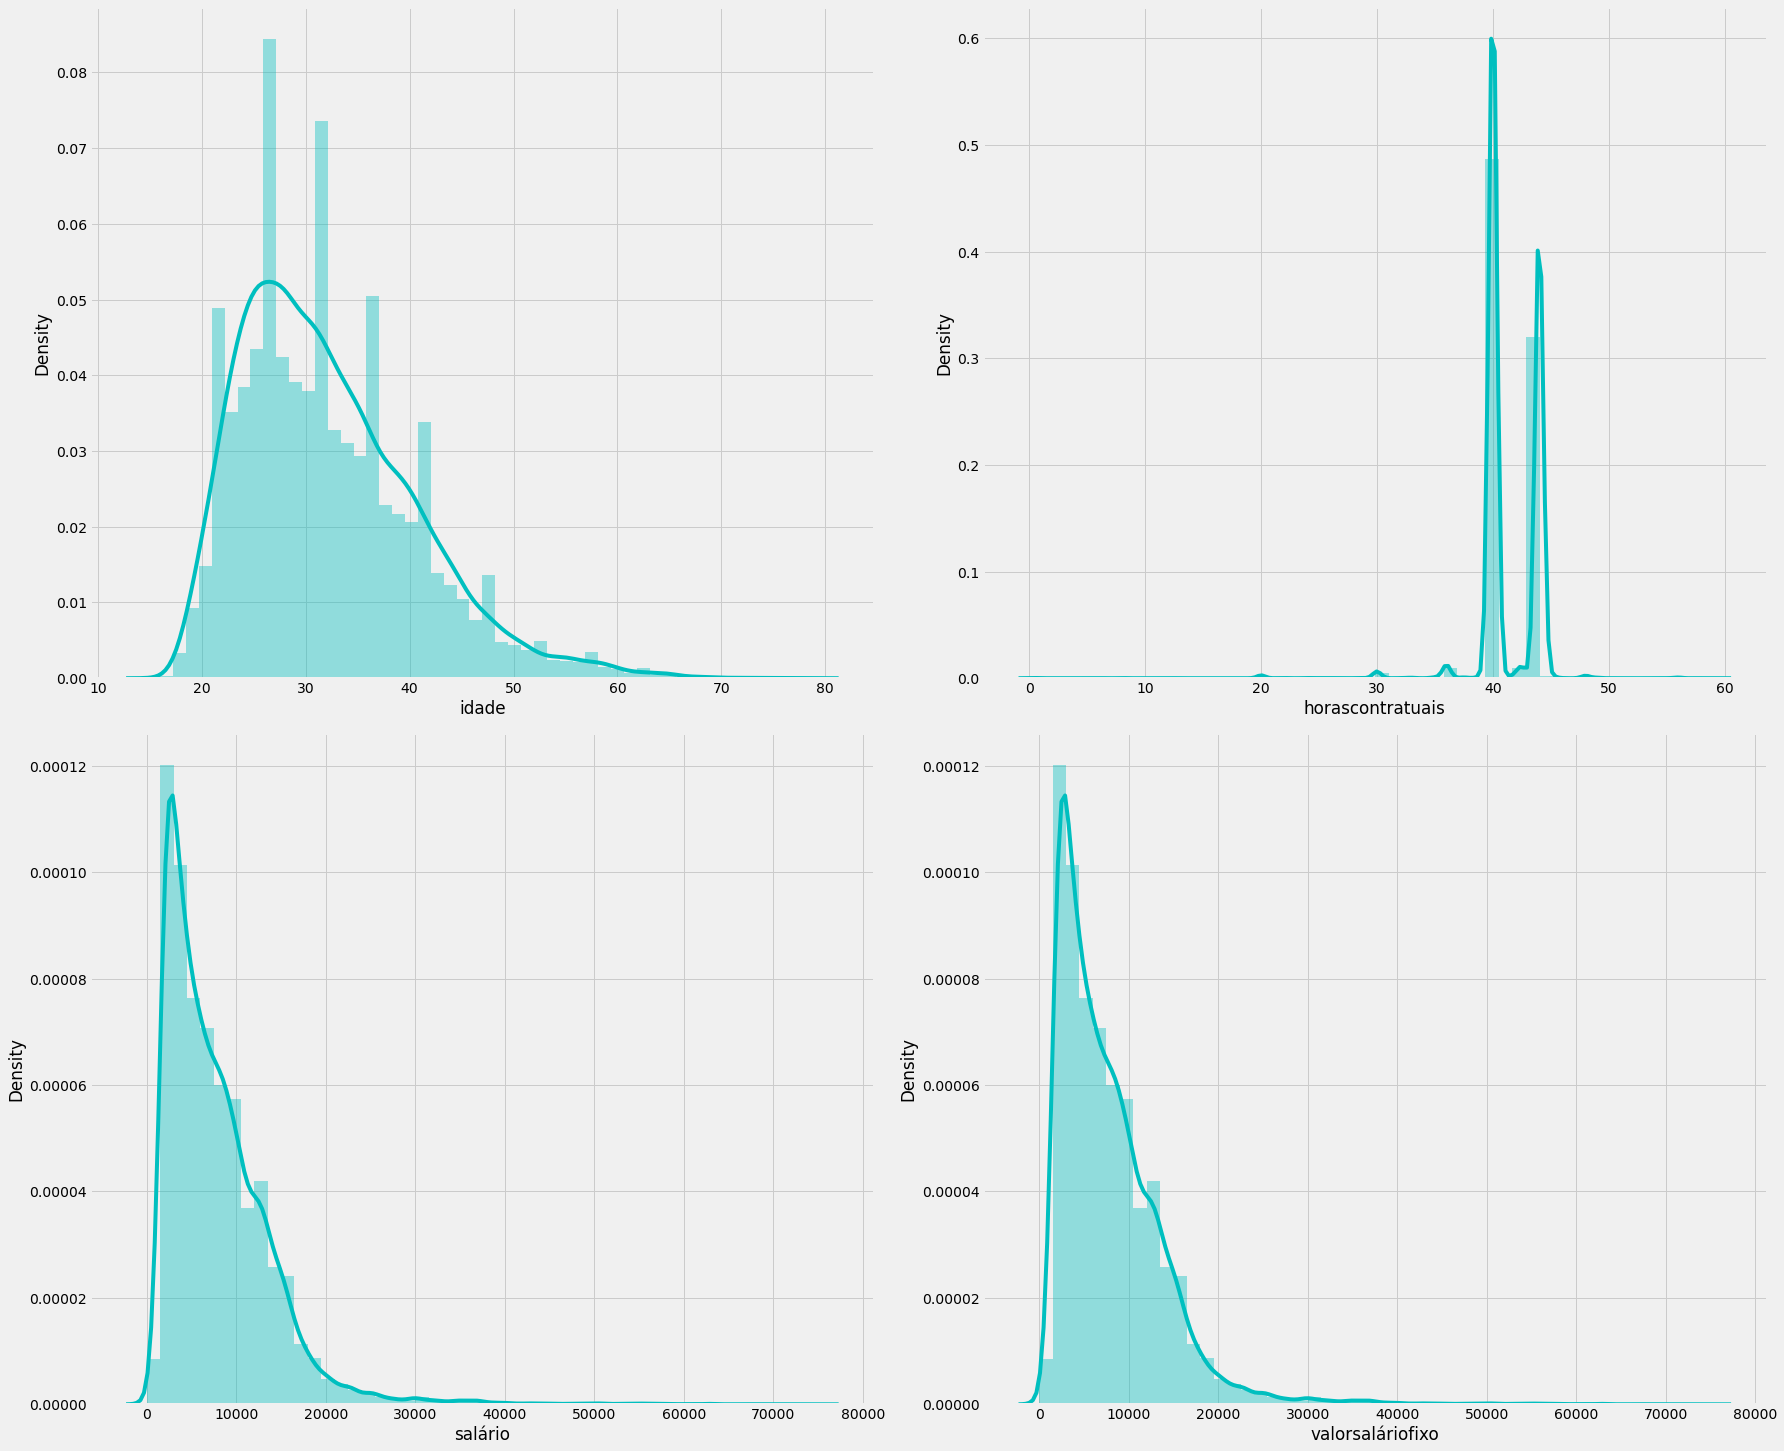

In [21]:
generate_plot(df[var_quant],4,2)

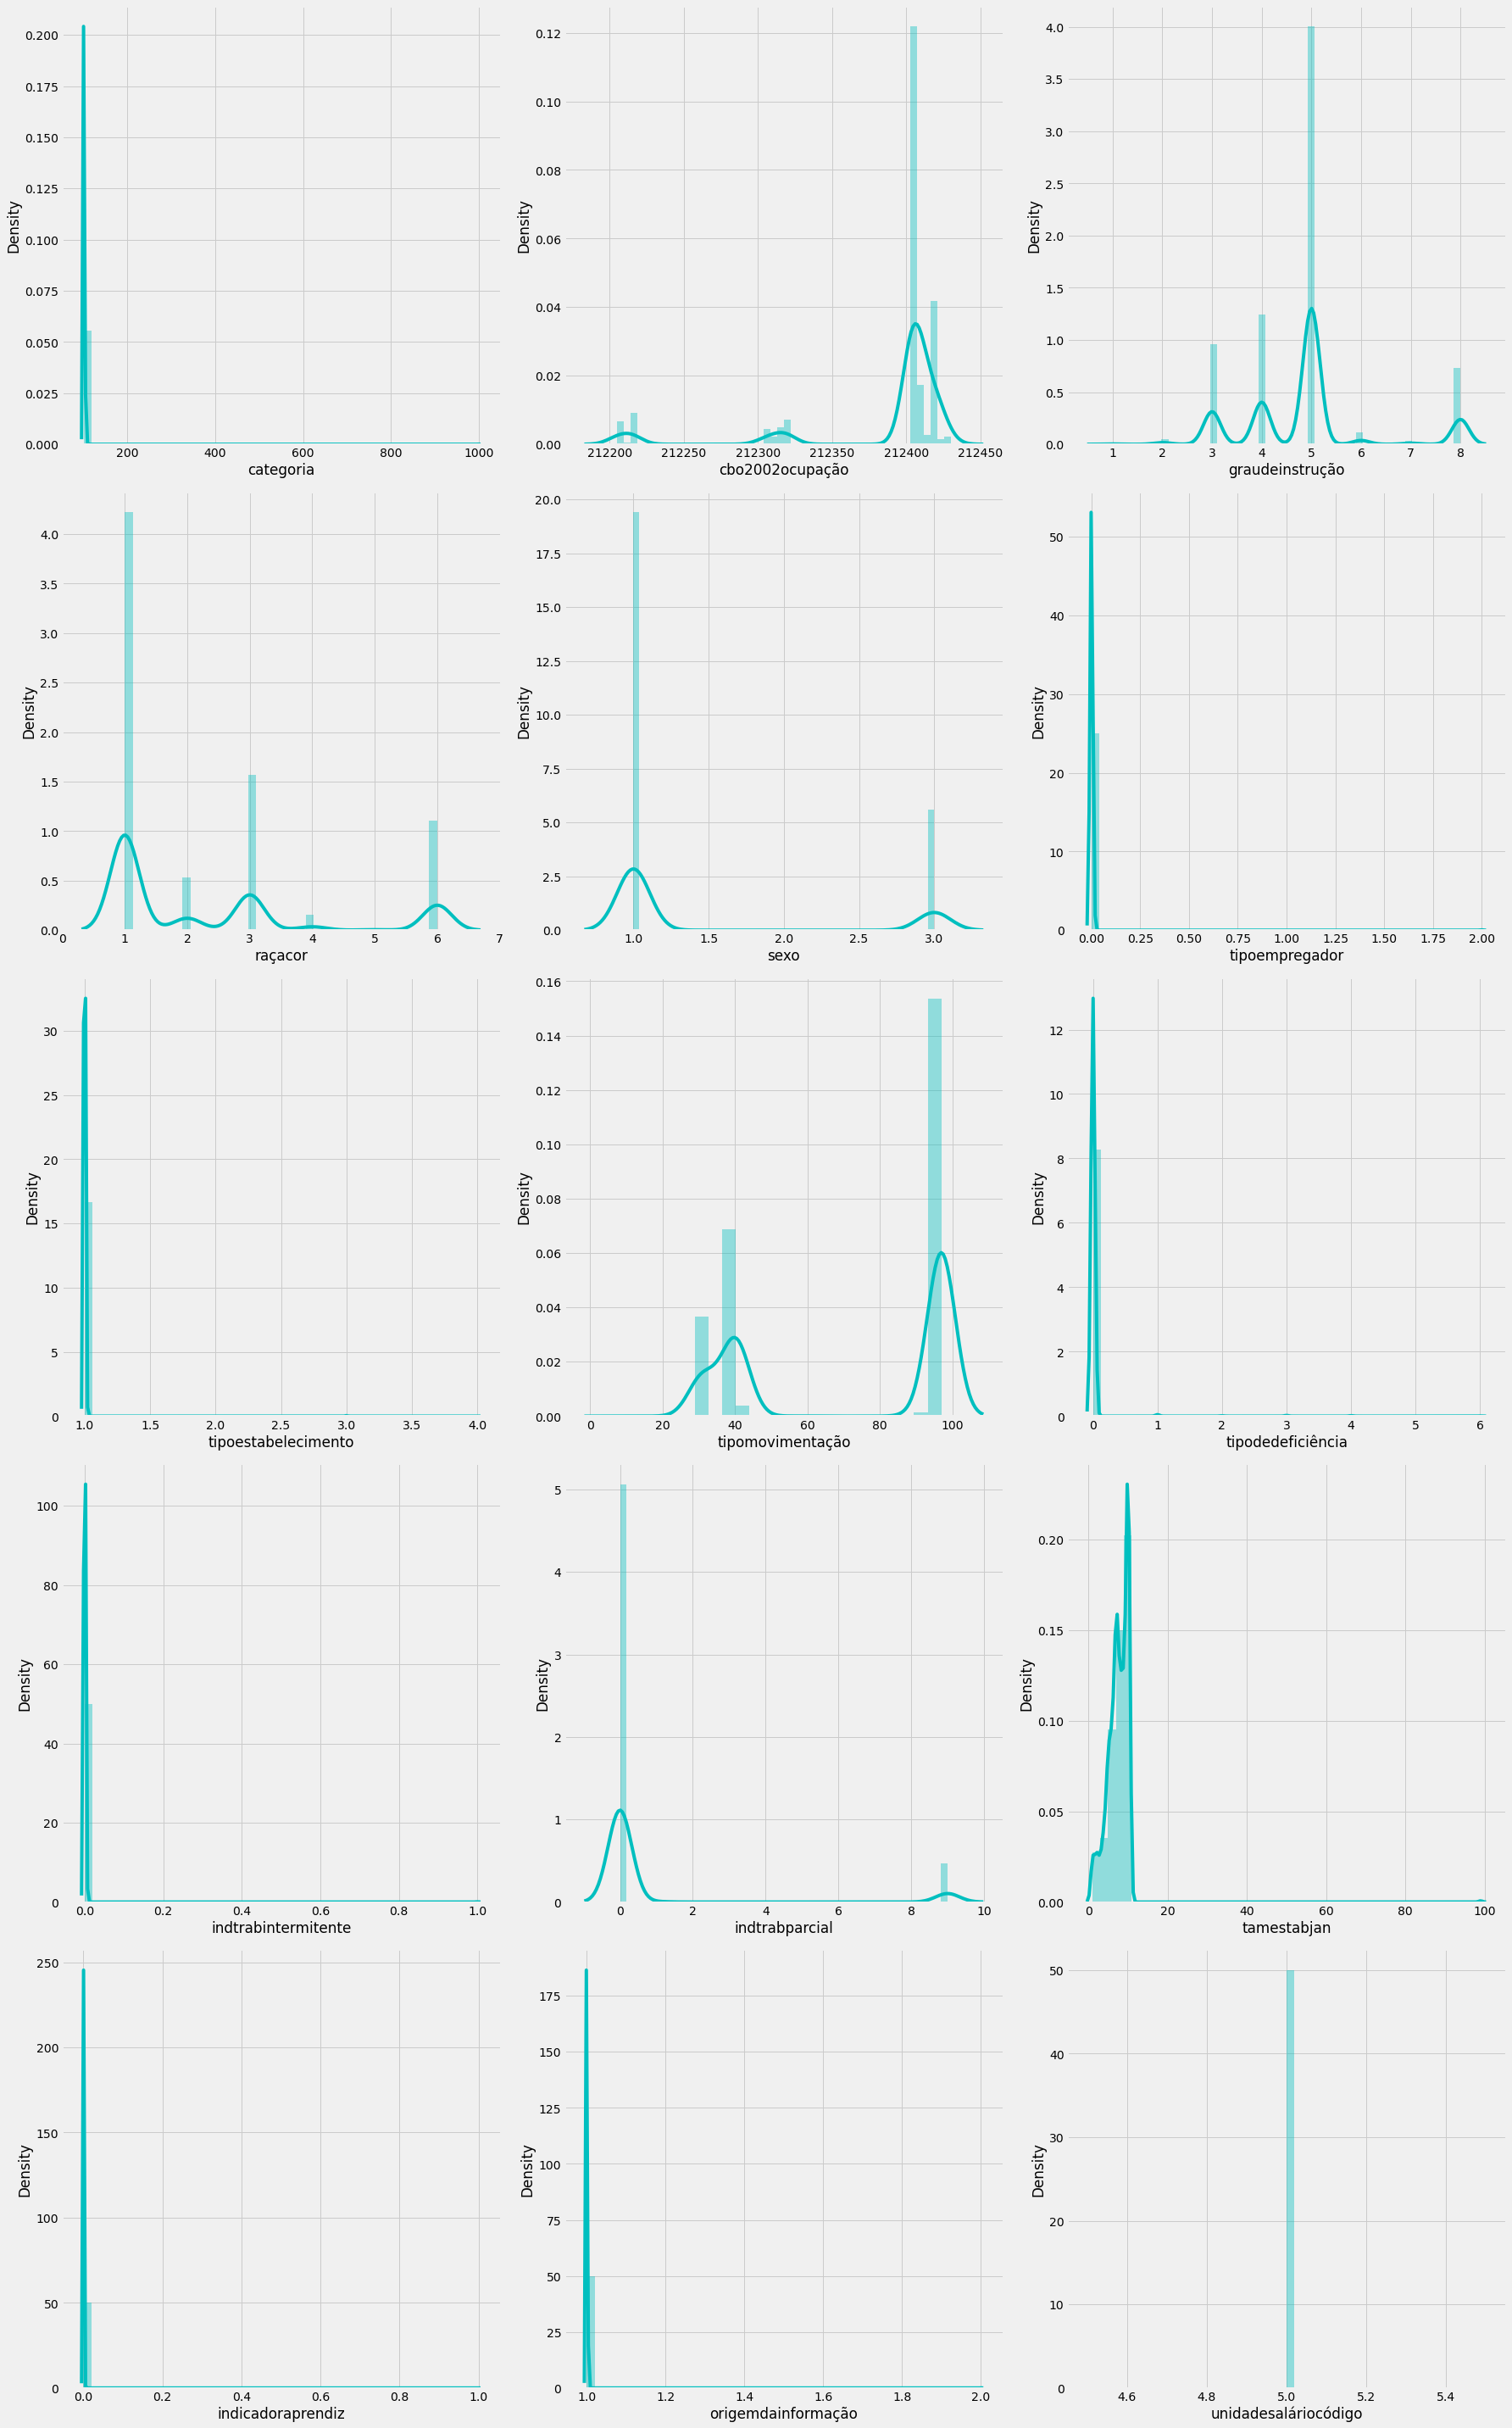

In [22]:
generate_plot(df[var_qua],5,3)

In [23]:
df[var_quant].describe(percentiles = [.25, .5, .75, .95, .99]).round(2).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
idade,26451.0,32.08,8.4,16.00,26.0,31.0,37.0,48.0,58.0,78.0
horascontratuais,26454.0,41.40,2.7,0.12,40.0,40.0,44.0,44.0,44.0,59.5
salário,26454.0,7824.61,5896.6,0.00,3500.0,6500.0,10600.0,17600.0,29134.1,75000.0
valorsaláriofixo,26454.0,7824.61,5896.6,0.00,3500.0,6500.0,10600.0,17600.0,29134.1,75000.0


In [24]:
# Employment category 101 = [CLT] 106 = [Temporary]
df.categoria.value_counts()

101    26049
106      305
105       79
111       11
999        6
103        4
Name: categoria, dtype: int64

In [25]:
# To put percentage numbers above chart ( With hue , Without hue)

def percen (plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def percen_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.0f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [26]:
sns.set_palette('viridis')
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [27]:
# Boxplot function

def grafico_boxplot(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(y="valorsaláriofixo", x=variable, data=data, palette='viridis')
    plt.ylabel(label)
    plt.xticks(rotation = 90)
    plt.show()

In [28]:
# Barplot function

def grafico_barras_prop(data, variable):
    (data[[variable]]
     .value_counts(normalize=True, sort = True)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proportion", palette='viridis'))

    plt.ylim(0,1)
    plt.xticks(rotation = 90)
    plt.show()

<AxesSubplot:xlabel='valorsaláriofixo'>

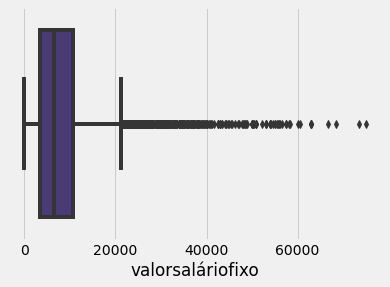

In [29]:
sns.boxplot(x=df.valorsaláriofixo)

In [30]:
df.nlargest(n=3, columns=['valorsaláriofixo'])

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
10853198,202208,3,35,355030,N,7810800,1,212210,101,5,...,0,75000.00,7,0,1,202208,0,5,75000.00,Engenheiro de Equipamentos em Computacao
9596289,202207,3,35,355030,N,7810800,-1,212215,101,5,...,0,73425.04,6,0,1,202207,0,5,73425.04,Engenheiros de Sistemas Operacionais em Comput...
9596618,202207,3,35,355030,N,7810800,1,212215,101,5,...,0,68474.00,6,0,1,202207,0,5,68474.00,Engenheiros de Sistemas Operacionais em Comput...


In [31]:
df.nsmallest(n=3, columns=['valorsaláriofixo'])

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
912720,202208,3,35,355030,J,6201501,1,212405,101,5,...,0,0.0,8,0,1,202208,0,5,0.0,Analista de Desenvolvimento de Sistemas
919454,202207,3,35,355030,J,6209100,1,212405,101,5,...,0,0.0,5,0,1,202207,0,5,0.0,Analista de Desenvolvimento de Sistemas
937015,202206,3,35,355030,N,7911200,1,212405,101,8,...,0,0.0,3,0,1,202206,0,5,0.0,Analista de Desenvolvimento de Sistemas


In [32]:
df['valorsaláriofixo'].value_counts()[0]

23

Z-Score (also called a standard score) gives you an idea of how far from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is.

In [33]:
# Interquartile range to detect outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 2.7 * IQR
    lower_limit = Q1 - 2.7 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(df, "valorsaláriofixo")
print("Upper limit: ", upper)
print("Lower Limit: ", lower)

Upper limit:  29770.0
Lower Limit:  -15670.0


In [34]:
# Standard deviation to detect outliers
def outlier_removal(df, variable):
    upper_limit = df[variable].mean() + 3 * df[variable].std()
    lower_limit = df[variable].mean() - 3 * df[variable].std()
    return upper_limit, lower_limit
upper_limit, lower_limit = outlier_removal(df, "valorsaláriofixo")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  25514.419624665774
Lower Limit:  -9865.20893743509


In [35]:
df[(df['valorsaláriofixo'] < lower_limit) | (df['valorsaláriofixo'] > upper_limit)]

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
903158,202208,3,35,355030,N,8211300,-1,212405,101,4,...,0,27375.00,9,0,1,202208,0,5,27375.00,Analista de Desenvolvimento de Sistemas
903350,202208,3,35,355030,N,8211300,1,212405,101,8,...,9,30000.00,1,0,1,202208,0,5,30000.00,Analista de Desenvolvimento de Sistemas
903406,202208,3,35,355030,N,8220200,-1,212405,101,5,...,0,27000.00,10,0,1,202208,0,5,27000.00,Analista de Desenvolvimento de Sistemas
903558,202208,3,35,355030,J,6204000,-1,212405,101,6,...,0,44316.67,9,0,1,202208,0,5,44316.67,Analista de Desenvolvimento de Sistemas
903867,202208,3,35,355030,J,6204000,1,212405,101,8,...,0,30000.00,9,0,1,202208,0,5,30000.00,Analista de Desenvolvimento de Sistemas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10853198,202208,3,35,355030,N,7810800,1,212210,101,5,...,0,75000.00,7,0,1,202208,0,5,75000.00,Engenheiro de Equipamentos em Computacao
10853208,202208,3,35,355030,P,8532500,-1,212210,101,8,...,0,29120.00,9,0,1,202208,0,5,29120.00,Engenheiro de Equipamentos em Computacao
10853233,202207,3,35,355030,J,6319400,1,212210,101,4,...,0,32000.00,1,0,1,202207,0,5,32000.00,Engenheiro de Equipamentos em Computacao
10853246,202207,3,35,355030,J,6203100,-1,212210,101,8,...,0,32000.50,7,0,1,202207,0,5,32000.50,Engenheiro de Equipamentos em Computacao


In [36]:
# Filtering salary values >= R$ 1212 Brazilian Minimal Wage & <= upper
df = df[(df.valorsaláriofixo >= 1212) & (df['valorsaláriofixo'] < upper)]
df.head(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
902440,202208,3,35,355030,K,6542100,-1,212405,101,5,...,0,13000.0,9,0,1,202208,0,5,13000.0,Analista de Desenvolvimento de Sistemas
902441,202208,3,35,355030,N,8220200,-1,212405,101,4,...,0,11793.0,9,0,1,202208,0,5,11793.0,Analista de Desenvolvimento de Sistemas
902444,202208,3,35,355030,J,6201501,1,212405,101,5,...,9,11175.0,9,0,1,202208,0,5,11175.0,Analista de Desenvolvimento de Sistemas


In [37]:
df.shape

(26100, 29)

In [38]:
# Exporting dataset to csv file to simply the process 
df.to_csv('cagedmov2022-08-07-06.csv')

<AxesSubplot:xlabel='valorsaláriofixo'>

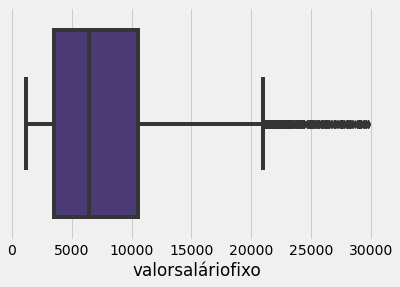

In [39]:
sns.boxplot(x=df.valorsaláriofixo)

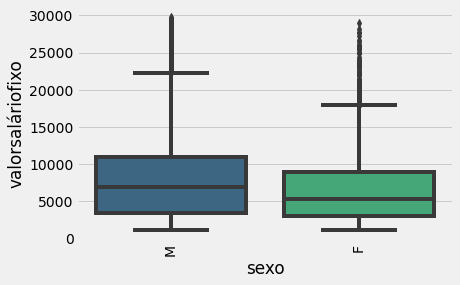

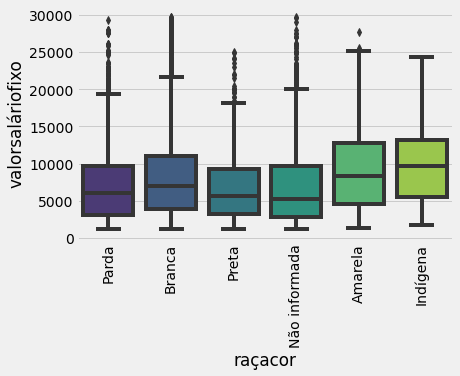

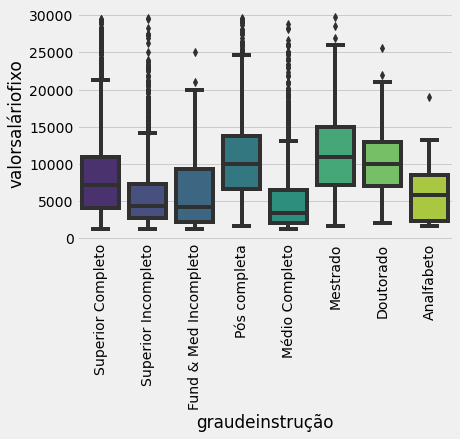

In [40]:
grafico_boxplot(df.replace(label_quali), "sexo", "valorsaláriofixo")
grafico_boxplot(df.replace(label_quali), "raçacor", "valorsaláriofixo")
grafico_boxplot(df.replace(label_quali), "graudeinstrução", "valorsaláriofixo")

<AxesSubplot:xlabel='valorsaláriofixo', ylabel='idade'>

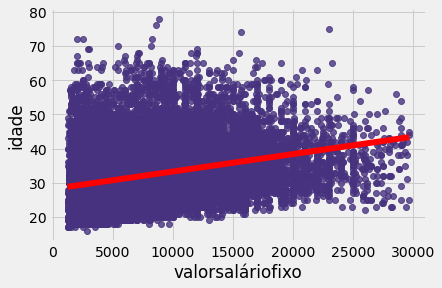

In [41]:
sns.regplot(x=df.valorsaláriofixo , y=df.idade, line_kws={'color': 'red'})

<AxesSubplot:xlabel='valorsaláriofixo', ylabel='graudeinstrução'>

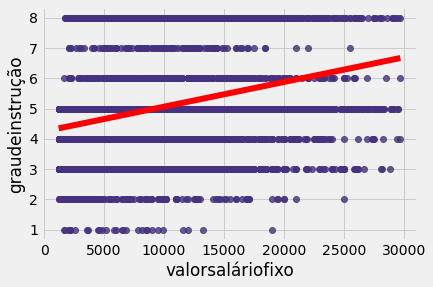

In [42]:
sns.regplot(x=df.valorsaláriofixo , y=df.graudeinstrução, line_kws={'color': 'red'})

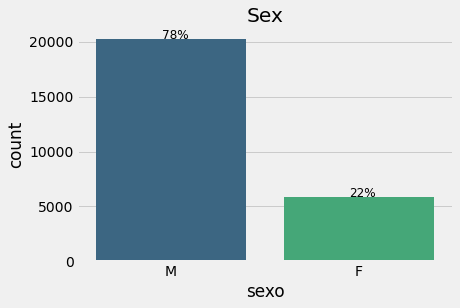

In [44]:
ax = sns.countplot( x=df.replace(label_quali).sexo , data= df, palette='viridis')
ax.set_title('Sex')
percen(ax , df.sexo)

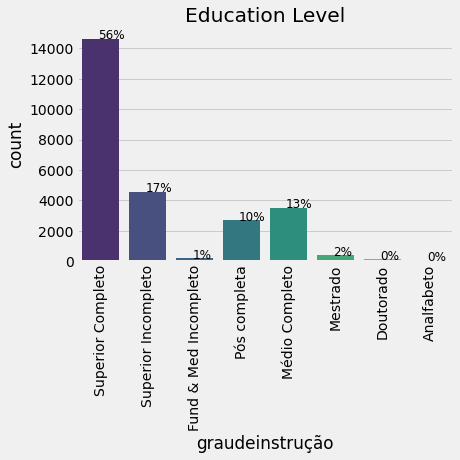

In [45]:
ax = sns.countplot( x='graudeinstrução' , data= df.replace(label_quali), palette='viridis')
ax.set_title('Education Level')
plt.xticks(rotation = 90)
percen(ax , df.graudeinstrução)

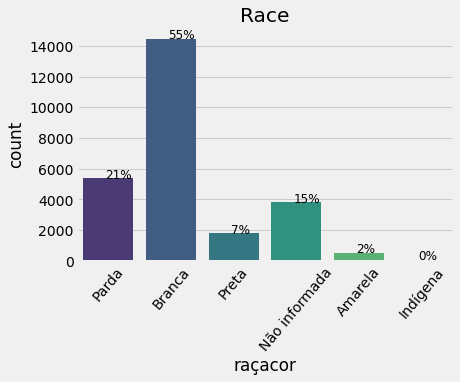

In [46]:
ax = sns.countplot( x='raçacor' , data= df.replace(label_quali), palette='viridis')
ax.set_title('Race')
plt.xticks(rotation = 50)
percen(ax , df.raçacor)

In [47]:
df.replace(label_quali).raçacor.value_counts()

Branca           14465
Parda             5394
Não informada     3818
Preta             1820
Amarela            523
Indígena            80
Name: raçacor, dtype: int64

<AxesSubplot:title={'center':'Average Salary by Race'}, xlabel='raçacor', ylabel='valorsaláriofixo'>

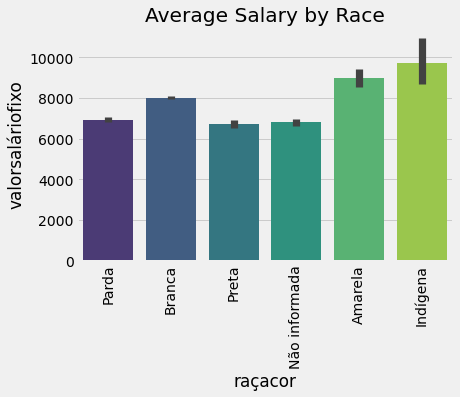

In [48]:
plt.title('Average Salary by Race')
plt.xticks(rotation = 90)
sns.barplot(data=df.replace(label_quali), x="raçacor", y="valorsaláriofixo", palette='viridis')

Text(0.5, 1.0, 'Salaries ratio for Male/Female')

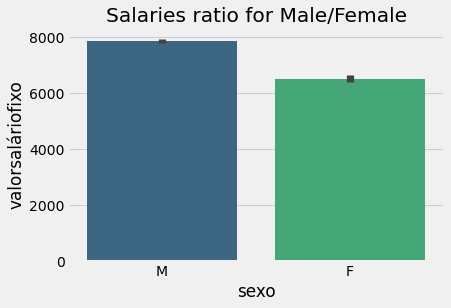

In [49]:
ax = sns.barplot(data=df.replace(label_quali), x="sexo", y="valorsaláriofixo", palette='viridis')
ax.set_title('Salaries ratio for Male/Female')

<AxesSubplot:title={'center':'Average Salary by Education Level'}, xlabel='graudeinstrução', ylabel='valorsaláriofixo'>

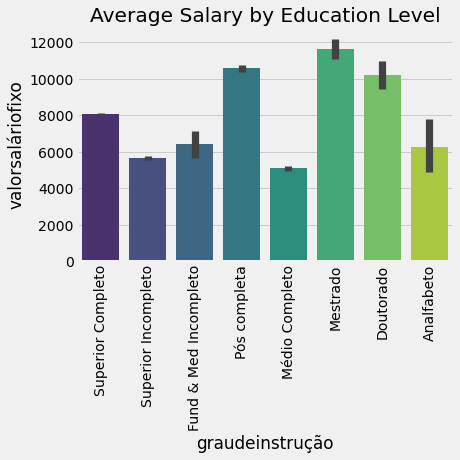

In [50]:
plt.title('Average Salary by Education Level')
plt.xticks(rotation = 90)
sns.barplot(data=df.replace(label_quali),  x="graudeinstrução", y="valorsaláriofixo", palette='viridis')

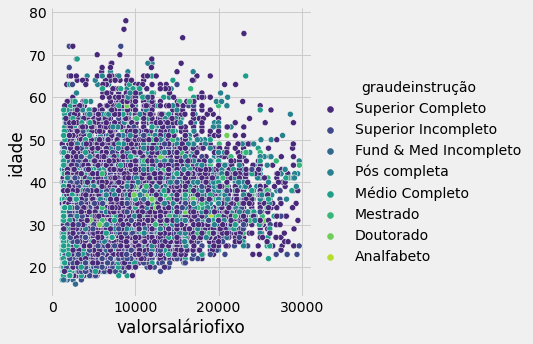

In [51]:
sns.relplot(data=df.replace(label_quali), x='valorsaláriofixo', y='idade', hue='graudeinstrução', palette='viridis')

In [52]:
pd.DataFrame({'Education Level': df.replace(label_quali).groupby('graudeinstrução')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('graudeinstrução')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1].head(10)

,Education Level,Mean salary
5,Pós completa,11624.20
7,Superior Incompleto,10566.73
6,Superior Completo,10205.93
4,Médio Completo,8063.95
1,Doutorado,6392.43
0,Analfabeto,6252.97
3,Mestrado,5665.92
2,Fund & Med Incompleto,5099.70


In [53]:
df.replace(label_quali).graudeinstrução.value_counts(normalize=True).mul(100).round(2).astype(str) + ' %'

Superior Completo        56.03 %
Superior Incompleto      17.49 %
Médio Completo           13.47 %
Pós completa             10.24 %
Mestrado                  1.51 %
Fund & Med Incompleto      0.7 %
Doutorado                 0.45 %
Analfabeto                0.12 %
Name: graudeinstrução, dtype: object

In [54]:
df.replace(label_quali).graudeinstrução.value_counts()

Superior Completo        14623
Superior Incompleto       4564
Médio Completo            3516
Pós completa              2673
Mestrado                   393
Fund & Med Incompleto      182
Doutorado                  118
Analfabeto                  31
Name: graudeinstrução, dtype: int64

In [55]:
df[(df.replace(label_quali)['graudeinstrução'] == 'Analfabeto')]

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
906345,202208,3,35,355030,M,7020400,1,212405,101,1,...,0,9500.00,10,0,1,202208,0,5,9500.00,Analista de Desenvolvimento de Sistemas
906941,202208,3,35,355030,Q,8640202,-1,212405,101,1,...,0,9880.00,10,0,1,202208,0,5,9880.00,Analista de Desenvolvimento de Sistemas
909061,202208,3,35,355030,J,6311900,1,212405,101,1,...,0,1742.00,8,0,1,202208,0,5,1742.00,Analista de Desenvolvimento de Sistemas
909660,202208,3,35,355030,J,6209100,-1,212405,101,1,...,0,13271.40,7,0,1,202208,0,5,13271.40,Analista de Desenvolvimento de Sistemas
909975,202208,3,35,355030,J,6204000,-1,212405,101,1,...,0,2122.10,8,0,1,202208,0,5,2122.10,Analista de Desenvolvimento de Sistemas
910098,202208,3,35,355030,J,6204000,1,212405,101,1,...,0,2034.00,2,0,1,202208,0,5,2034.00,Analista de Desenvolvimento de Sistemas
911422,202208,3,35,355030,J,6319400,-1,212405,101,1,...,0,8125.01,7,0,1,202208,0,5,8125.01,Analista de Desenvolvimento de Sistemas
913026,202208,3,35,355030,M,7020400,-1,212405,101,1,...,0,5801.22,10,0,1,202208,0,5,5801.22,Analista de Desenvolvimento de Sistemas
915955,202208,3,35,355030,J,6201501,-1,212405,101,1,...,0,6865.23,9,0,1,202208,0,5,6865.23,Analista de Desenvolvimento de Sistemas
917771,202207,3,35,355030,J,6204000,1,212405,101,1,...,0,12000.00,5,0,1,202207,0,5,12000.00,Analista de Desenvolvimento de Sistemas


<AxesSubplot:>

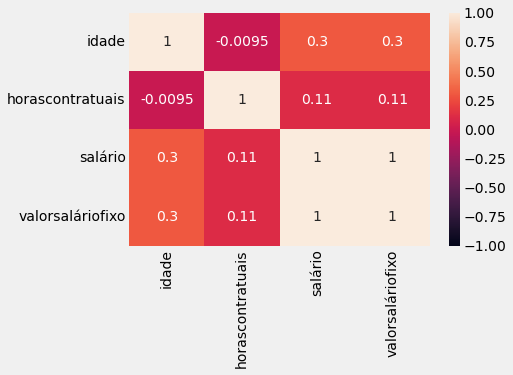

In [56]:
sns.heatmap(data=df[var_quant].corr(), annot=True, vmin=-1, vmax=1 )

<AxesSubplot:>

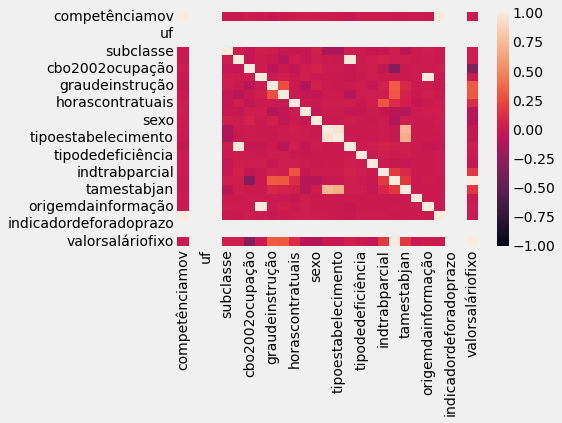

In [57]:
sns.heatmap(data=df.corr(), vmin=-1, vmax=1 )

<AxesSubplot:title={'center':'Occupattion'}, xlabel='Descrição', ylabel='valorsaláriofixo'>

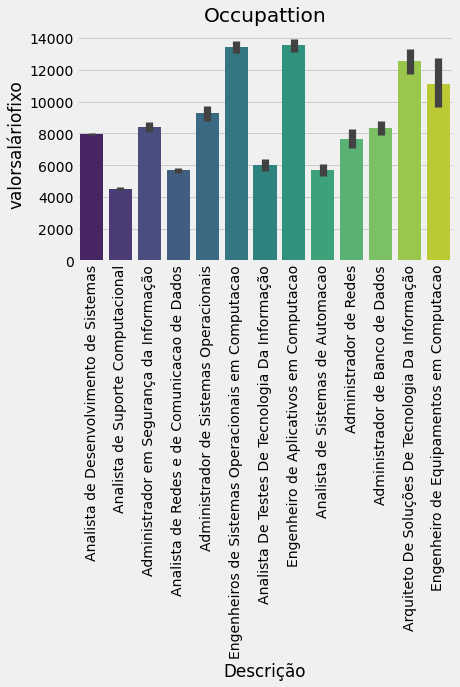

In [58]:
plt.xticks(rotation = 90)
plt.title('Occupattion')
sns.barplot(data=df.replace(label_quali), x="Descrição", y="valorsaláriofixo", palette='viridis')

In [59]:
pd.DataFrame({'Occupattion': df.groupby('Descrição')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('Descrição')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Occupattion,Mean salary
10,Engenheiro de Aplicativos em Computacao,13573.14
12,Engenheiros de Sistemas Operacionais em Comput...,13466.52
9,Arquiteto De Soluções De Tecnologia Da Informação,12543.46
11,Engenheiro de Equipamentos em Computacao,11115.79
2,Administrador de Sistemas Operacionais,9299.00
3,Administrador em Segurança da Informação,8428.74
0,Administrador de Banco de Dados,8314.81
5,Analista de Desenvolvimento de Sistemas,7987.57
1,Administrador de Redes,7665.23
4,Analista De Testes De Tecnologia Da Informação,6004.41


In [60]:
df.Descrição.value_counts(normalize=True).mul(100).round(2).astype(str) + ' %'

Analista de Desenvolvimento de Sistemas               55.41 %
Analista de Suporte Computacional                     18.79 %
Analista de Redes e de Comunicacao de Dados             7.8 %
Engenheiros de Sistemas Operacionais em Computacao     3.64 %
Administrador em Segurança da Informação               3.22 %
Engenheiro de Aplicativos em Computacao                2.85 %
Administrador de Sistemas Operacionais                  2.2 %
Administrador de Banco de Dados                        2.04 %
Analista de Sistemas de Automacao                      1.26 %
Analista De Testes De Tecnologia Da Informação          1.0 %
Administrador de Redes                                 0.98 %
Arquiteto De Soluções De Tecnologia Da Informação      0.65 %
Engenheiro de Equipamentos em Computacao               0.16 %
Name: Descrição, dtype: object

In [61]:
pd.DataFrame({'Age': df.groupby('idade')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('idade')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1]


,Age,Mean salary
57,75.0,23048.59
56,74.0,15681.54
44,60.0,11333.09
52,68.0,10872.46
50,66.0,10797.86
46,62.0,10318.06
32,48.0,10161.34
42,58.0,10124.59
33,49.0,10118.70
38,54.0,10101.06


In [62]:
pd.DataFrame({'Weekly working hours': df.groupby('horascontratuais')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('horascontratuais')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Weekly working hours,Mean salary
28,35.20,21532.80
79,48.00,16784.99
75,44.92,14000.00
47,41.00,11563.01
45,40.80,11413.34
...,...,...
9,17.60,1750.00
19,28.75,1403.40
18,28.33,1351.00
65,43.67,1252.00


### Modeling